In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
missing_vals = ['n/a','na','--','none',' ']

## Prepare Product Dataset

In [3]:
product_df = pd.read_csv('dh_product_lookup.csv',na_values=missing_vals)
product_df

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ
...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16 OZ
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32 OZ
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,2 LB
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16 OZ


In [4]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         924 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


In [5]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         924 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


In [6]:
product_df.duplicated().sum()

0

In [7]:
product_df.isna().sum()

upc                    0
product_description    0
commodity              0
brand                  0
product_size           3
dtype: int64

## Prepare Causal Dataset

In [8]:
causal_df = pd.read_csv('dh_causal_lookup.csv',na_values=missing_vals)
causal_df

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1
...,...,...,...,...,...,...
351367,9999966721,387,101,Wrap Front Feature,Not on Display,1
351368,9999966720,387,101,Wrap Front Feature,Not on Display,1
351369,3620000507,387,104,Interior Page Feature,Not on Display,1
351370,3620000493,387,104,Interior Page Feature,Not on Display,1


In [9]:
causal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   upc           351372 non-null  int64 
 1   store         351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature_desc  351372 non-null  object
 4   display_desc  351372 non-null  object
 5   geography     351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


In [10]:
causal_df.isna().sum()

upc             0
store           0
week            0
feature_desc    0
display_desc    0
geography       0
dtype: int64

## Prepare Store Dataset

In [11]:
store_df = pd.read_csv('dh_store_lookup.csv',na_values=missing_vals)
store_df

,store,store_zip_code
0,1,37865
1,2,30084
2,3,30039
3,4,31210
4,5,30044
...,...,...
382,383,40502
383,384,42367
384,385,37160
385,386,29803


In [12]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   store           387 non-null    int64
 1   store_zip_code  387 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


## Prepare Transaction Dataset

In [13]:
transac_df = pd.read_csv('dh_transactions.csv',na_values=missing_vals)
transac_df

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0


In [14]:
transac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


In [15]:
transac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


In [16]:
transac_df.duplicated().sum()

0

In [17]:
transac_df.isna().sum()

upc                    0
dollar_sales           0
units                  0
time_of_transaction    0
geography              0
week                   0
household              0
store                  0
basket                 0
day                    0
coupon                 0
dtype: int64

In [18]:
transac_df = transac_df[transac_df['dollar_sales'] > 0]
transac_df

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0


## Create useful dataframe

In [19]:
df =  pd.merge(transac_df, product_df, on='upc', how='left')
new_order = ["pasta", "pasta sauce", "pancake mixes", "syrups"]
df['commodity'] = pd.Categorical(df['commodity'], categories=new_order)
df = df.sort_values('commodity')

In [20]:
df

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
2788885,9999985027,0.99,1,1220,2,59,148235,345,1791283,407,0,PRIVATE LABEL LASAGNA PASTA,pasta,Private Label,16 OZ
2788889,9999985037,0.79,1,1334,2,59,417393,345,1791285,407,0,PRIVATE LABEL SPAGHETTINIPASTA,pasta,Private Label Premium,16 OZ
2788891,9999985020,0.55,1,1403,2,59,32467,345,1791287,407,0,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,16 OZ
2788892,9999985002,0.65,1,1403,2,59,32467,345,1791287,407,0,PRIVATE LABEL ELBOW MACARONI,pasta,Private Label,8 OZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201478,9999967728,1.50,1,1321,1,22,215659,164,766412,148,0,PRIVATE LABEL LITE PANCAKE SYRUP,syrups,Private Label,24 OZ
4236585,3000005970,2.99,1,2306,1,85,402377,112,2714076,595,0,AUNT JEMIMA ORIGINL SYRUP,syrups,Aunt Jemima,24 OZ
1201481,3000005970,3.19,1,1329,1,22,224830,164,766413,148,0,AUNT JEMIMA ORIGINL SYRUP,syrups,Aunt Jemima,24 OZ
4236589,9999967727,2.49,1,1140,1,85,352160,102,2714078,595,0,PRIVATE LABEL SYRUP PLASTIC BOTTLE,syrups,Private Label,24 OZ


## Top 5 Brand in Each Commodity

In [21]:
top5_brand = (
df[df['brand'] != "nan"]
.groupby(['commodity', 'brand'])
.agg(total_sum=('dollar_sales', 'sum'))
.reset_index()
.sort_values('total_sum', ascending=False)
)

In [22]:
top5_brand = top5_brand.sort_values(['commodity','total_sum'], ascending=False)

In [23]:
top5_brand = top5_brand.groupby('commodity').apply(lambda x: x.nlargest(5, 'total_sum')).reset_index(drop=True)

In [24]:
top5_brand

,commodity,brand,total_sum
0,pasta,Private Label,995287.84
1,pasta,Barilla,433893.84
2,pasta,Creamette,271594.86
3,pasta,Mueller,270850.50
4,pasta,Ronzoni,213727.20
5,pasta sauce,Ragu,1500840.90
6,pasta sauce,Prego,799949.30
7,pasta sauce,Classico,438186.74
8,pasta sauce,Private Label,331095.74
9,pasta sauce,Bertolli,258102.06


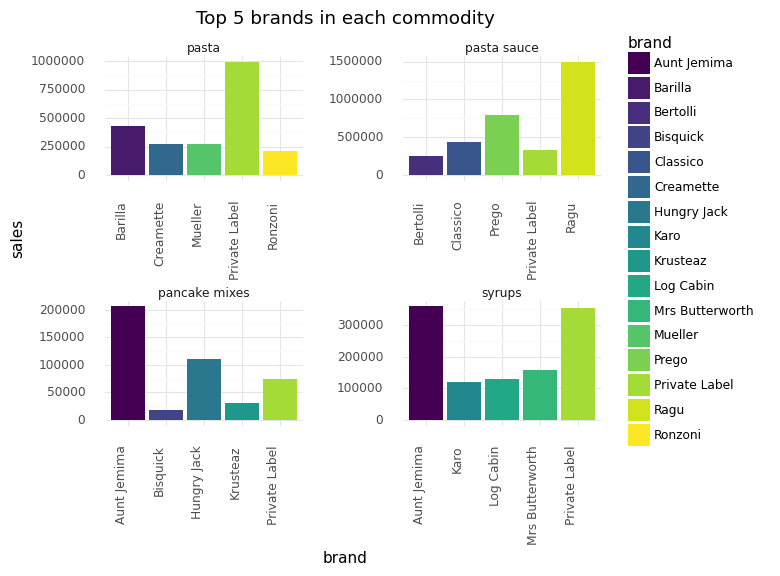

<ggplot: (107181616318)>

In [25]:
(
    ggplot(top5_brand) 
    + aes("brand","total_sum",fill='brand')
    + geom_col()
    + theme_minimal()
    + facet_wrap('commodity', scales = "free")
    + theme( panel_spacing=1.0,  axis_text_x=element_text(angle=90, ha='right', va='top'))
    + scale_color_ordinal(aesthetics = "fill")
    + labs(
        title = 'Top 5 brands in each commodity',
        y = 'sales'
    )
)

## correlation between pancake mix vs syrups | pasta vs pasta sauce

In [26]:
pancake_syrups = df.loc[df['commodity'].isin(['pancake mixes', 'syrups'])]
pancake_syrups = pancake_syrups[['basket', 'brand', 'commodity']]

In [27]:
pancake_syrups

,basket,brand,commodity
779520,496893,Hungry Jack,pancake mixes
1315828,842284,Mrs Butterworth,pancake mixes
1324066,847552,Hungry Jack,pancake mixes
1070788,681455,Aunt Jemima,pancake mixes
2069985,1332469,Private Label,pancake mixes
...,...,...,...
1201478,766412,Private Label,syrups
4236585,2714076,Aunt Jemima,syrups
1201481,766413,Aunt Jemima,syrups
4236589,2714078,Private Label,syrups


In [28]:
pancake_syrups_pivot = pancake_syrups.drop_duplicates(subset=['basket', 'commodity'], keep='first')
pancake_syrups_pivot = pancake_syrups_pivot.pivot(index='basket', columns='commodity', values='brand')

In [29]:
pancake_syrups_pivot

commodity,pancake mixes,syrups
basket,,
2,Hungry Jack,NaN
5,NaN,Hungry Jack
8,NaN,Aunt Jemima
20,Private Label,NaN
29,NaN,Pennant
...,...,...
3316335,NaN,Aunt Jemima
3316337,NaN,Mrs Butterworth
3316342,Aunt Jemima,NaN


In [30]:
pancake_syrups_pivot = pancake_syrups_pivot.dropna()
pancake_syrups_df = pancake_syrups_pivot.groupby(['pancake mixes', 'syrups']).size().reset_index(name='count')

In [31]:
pancake_syrups_df

,pancake mixes,syrups,count
0,Aunt Jemima,Alaga,251
1,Aunt Jemima,Aunt Jemima,15338
2,Aunt Jemima,Brier Rabbit,15
3,Aunt Jemima,Cary's,449
4,Aunt Jemima,Cozy Cottage,423
...,...,...,...
307,White Lily,Private Label Premium,113
308,White Lily,Private Label Value,20
309,White Lily,Smuckers,74
310,White Lily,Sobrab Bkstrp,2


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()
pancake_syrups_df['rescale'] = scaler.fit_transform(pancake_syrups_df[['count']])

In [34]:
pancake_syrups_df

,pancake mixes,syrups,count,rescale
0,Aunt Jemima,Alaga,251,0.016300
1,Aunt Jemima,Aunt Jemima,15338,1.000000
2,Aunt Jemima,Brier Rabbit,15,0.000913
3,Aunt Jemima,Cary's,449,0.029210
4,Aunt Jemima,Cozy Cottage,423,0.027515
...,...,...,...,...
307,White Lily,Private Label Premium,113,0.007303
308,White Lily,Private Label Value,20,0.001239
309,White Lily,Smuckers,74,0.004760
310,White Lily,Sobrab Bkstrp,2,0.000065


In [35]:
pancake_syrups_filtered_df = pancake_syrups_df[pancake_syrups_df['count'] > 1000]

In [36]:
pancake_syrups_filtered_df

,pancake mixes,syrups,count,rescale
1,Aunt Jemima,Aunt Jemima,15338,1.000000
8,Aunt Jemima,Hungry Jack,2038,0.132816
11,Aunt Jemima,Log Cabin,2523,0.164439
16,Aunt Jemima,Mrs Butterworth,4500,0.293343
17,Aunt Jemima,Northwoods,3324,0.216666
20,Aunt Jemima,Private Label,9138,0.595749
107,Hungry Jack,Aunt Jemima,4847,0.315968
113,Hungry Jack,Hungry Jack,3082,0.200887
116,Hungry Jack,Log Cabin,1504,0.097998
121,Hungry Jack,Mrs Butterworth,2678,0.174545


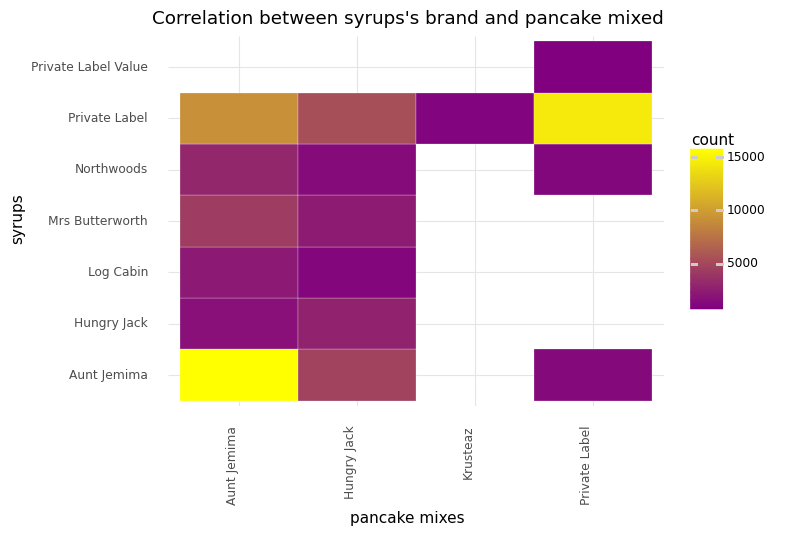

<ggplot: (107182129174)>

In [37]:
(
    ggplot(pancake_syrups_filtered_df) 
    + aes("pancake mixes","syrups")
    + geom_tile(aes(fill = 'count'), colour = "white" )
    + theme_minimal()
    + theme( panel_spacing=1.0,  axis_text_x=element_text(angle=90, ha='right', va='top'))
    + scale_fill_gradient(low='purple',high='yellow')
    + labs(
        title = "Correlation between syrups's brand and pancake mixed"
    )
)

In [38]:
pasta_sau = df.loc[df['commodity'].isin(['pasta', 'pasta sauce'])]
pasta_sau = pasta_sau[['basket', 'brand', 'commodity']]

In [39]:
pasta_sau

,basket,brand,commodity
0,1,Barilla,pasta
2788885,1791283,Private Label,pasta
2788889,1791285,Private Label Premium,pasta
2788891,1791287,Private Label,pasta
2788892,1791287,Private Label,pasta
...,...,...,...
1773609,1141045,Barilla,pasta sauce
3010937,1932680,Ragu,pasta sauce
969895,617318,Hunt's,pasta sauce
3010527,1932452,Ragu,pasta sauce


In [40]:
pasta_sau_pivot = pasta_sau.drop_duplicates(subset=['basket', 'commodity'], keep='first')
pasta_sau_pivot = pasta_sau_pivot.pivot(index='basket', columns='commodity', values='brand')

In [41]:
pasta_sau_pivot

commodity,pasta,pasta sauce
basket,,
1,Barilla,Bertolli
3,Private Label,NaN
4,Private Label Premium,Prego
5,Private Label,NaN
6,Private Label Premium,NaN
...,...,...
3316343,NaN,Hunt's
3316346,Private Label,Private Label
3316347,Private Label,NaN


In [42]:
pasta_sau_pivot = pasta_sau_pivot.dropna()
pasta_sau_df = pasta_sau_pivot.groupby(['pasta', 'pasta sauce']).size().reset_index(name='count')

In [43]:
pasta_sau_df

,pasta,pasta sauce,count
0,Al Dente,Alessi,2
1,Al Dente,Barilla,15
2,Al Dente,Bertolli,63
3,Al Dente,Boves,2
4,Al Dente,Buitoni,8
...,...,...,...
544,Sugar Buster,Ragu,10
545,Wacky Mac,Bertolli,2
546,Wacky Mac,Hunt's,2
547,Wacky Mac,Private Label,3


In [44]:
pasta_sau_df['rescale'] = scaler.fit_transform(pasta_sau_df[['count']])

In [45]:
pasta_sau_df.describe()

,count,rescale
count,549.000000,549.000000
mean,1490.606557,0.009853
std,8630.454164,0.057089
min,1.000000,0.000000
25%,2.000000,0.000007
50%,8.000000,0.000046
75%,102.000000,0.000668
max,151177.000000,1.000000


In [46]:
pasta_filtered_df = pasta_sau_df[pasta_sau_df['count'] > 5000]

In [47]:
pasta_filtered_df

,pasta,pasta sauce,count,rescale
29,Barilla,Barilla,8993,0.059480
31,Barilla,Bertolli,8890,0.058799
38,Barilla,Classico,12915,0.085424
44,Barilla,Hunt's,7735,0.051159
49,Barilla,Prego,20354,0.134631
50,Barilla,Private Label,7615,0.050365
52,Barilla,Ragu,35680,0.236010
115,Creamette,Hunt's,9223,0.061002
117,Creamette,Prego,16802,0.111135
118,Creamette,Private Label,5091,0.033669


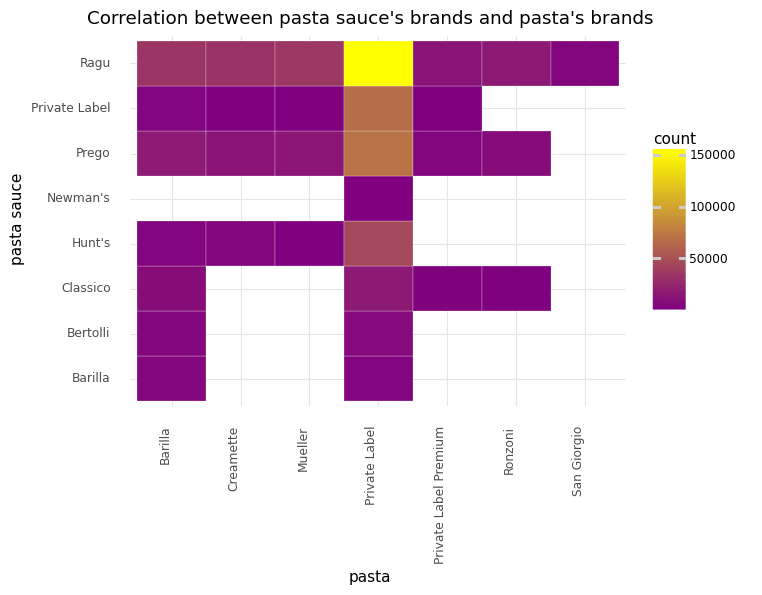

<ggplot: (107182214449)>

In [48]:
(
    ggplot(pasta_filtered_df) 
    + aes("pasta","pasta sauce")
    + geom_tile(aes(fill = 'count'), colour = "white" )
    + theme_minimal()
    + theme( panel_spacing=1.0,  axis_text_x=element_text(angle=90, ha='right', va='top'))
    + scale_fill_gradient(low='purple',high='yellow')
    + labs(
        title = "Correlation between pasta sauce's brands and pasta's brands"
    )
)

## Peak hours

In [49]:
transac_df['time_of_transaction'] = transac_df['time_of_transaction'].astype('str')

In [50]:
transac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5188096 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  object 
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 475.0+ MB


In [51]:
transac_df['time'] = transac_df['time_of_transaction'].str.zfill(4).str[:2]

In [52]:
peak_time = transac_df.merge(product_df, on='upc', how='left')[['upc', 'time', 'commodity']].dropna(subset=['commodity'])

In [53]:
peak_time

,upc,time,commodity
0,7680850106,11,pasta
1,3620000470,11,pasta sauce
2,1800028064,11,pancake mixes
3,9999985067,11,pasta
4,9999985131,13,pasta
...,...,...,...
5188091,9999985001,23,pasta
5188092,9999966720,23,pasta sauce
5188093,9999985027,23,pasta
5188094,3620000300,22,pasta sauce


In [54]:
peak_time.groupby(['time','commodity']).count().reset_index()

,time,commodity,upc
0,00,pancake mixes,2438
1,00,pasta,10708
2,00,pasta sauce,10057
3,00,syrups,5214
4,01,pancake mixes,1456
...,...,...,...
91,22,syrups,17165
92,23,pancake mixes,4521
93,23,pasta,21152
94,23,pasta sauce,19479


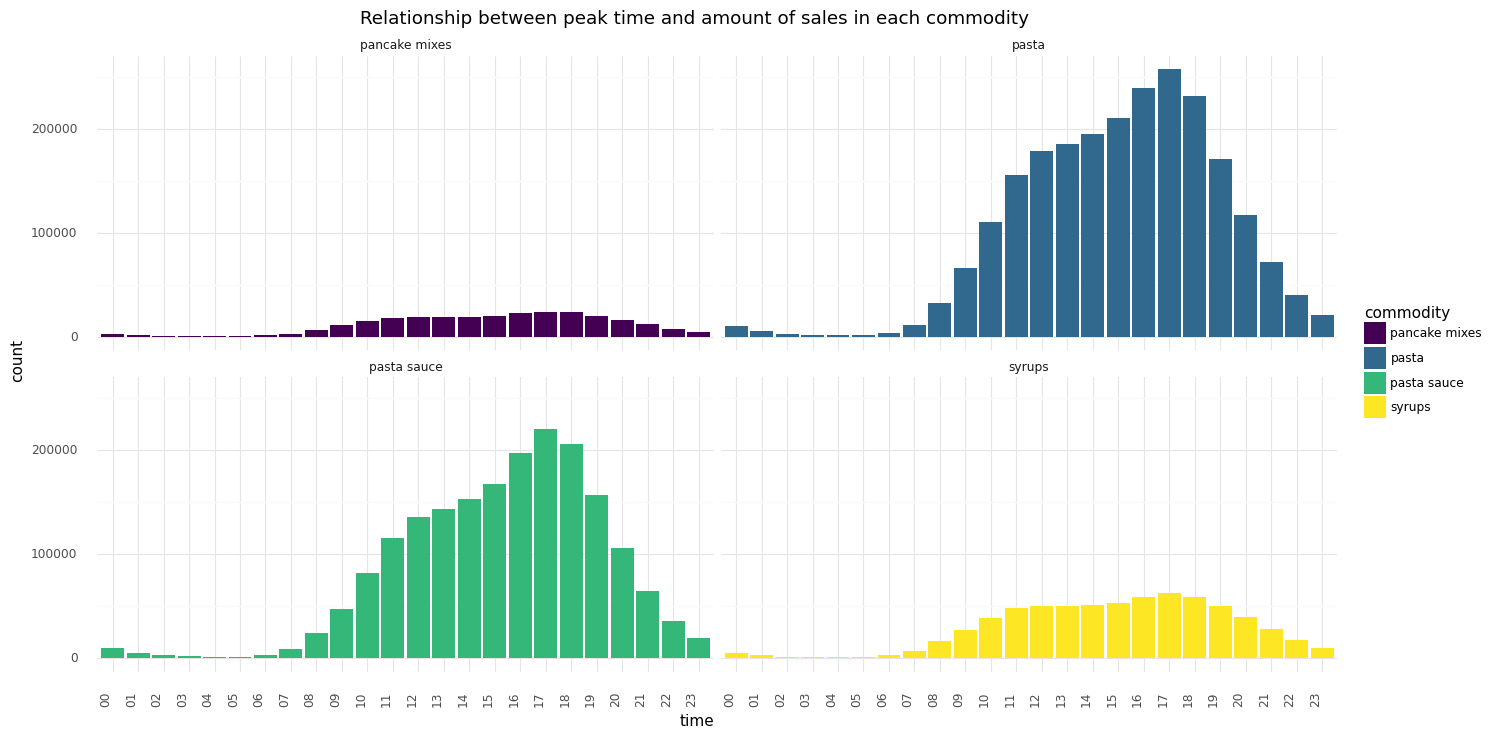

<ggplot: (107290707113)>

In [55]:
(
    ggplot(peak_time) 
    + aes("time", fill = 'commodity')
    + geom_histogram(stat="count")
    + theme_minimal()
    + facet_wrap('~commodity', nrow = 2)
    + theme(axis_text_x=element_text(angle=90, ha='right', va='top', hjust = 1), figure_size=(16, 8))
    + scale_color_ordinal(aesthetics = "fill")
    + labs(
        title = 'Relationship between peak time and amount of sales in each commodity ',
        y = 'count'
    )
)

## Does coupon matter?

In [56]:
coupon_transac = product_df.merge(transac_df, on='upc', how='inner').groupby(['commodity', 'week']).agg(coupon_count=('coupon', 'sum'), units_count=('units', 'sum')).reset_index()

In [57]:
coupon_transac

,commodity,week,coupon_count,units_count
0,pancake mixes,1,13,2707
1,pancake mixes,2,20,2840
2,pancake mixes,3,90,3228
3,pancake mixes,4,99,2893
4,pancake mixes,5,37,2498
...,...,...,...,...
411,syrups,100,176,6454
412,syrups,101,153,6528
413,syrups,102,182,6585
414,syrups,103,116,6983


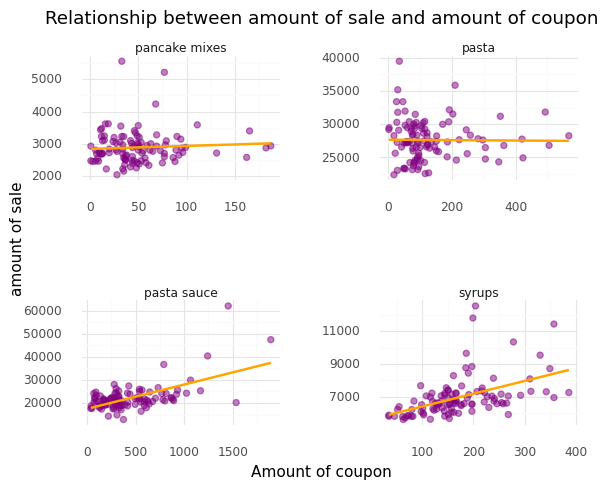

<ggplot: (107230747591)>

In [58]:
(
    ggplot(coupon_transac) 
    + aes("coupon_count", "units_count")
    + geom_point(alpha= 0.5,size = 2.0, color = 'purple')
    + theme_minimal()
    + facet_wrap('~commodity', nrow = 2, scales="free")
    + theme( panel_spacing=1.0)
    + geom_smooth(se = False, method = "lm", color = 'orange', size = 1)
    + labs(
        title = 'Relationship between amount of sale and amount of coupon',
        x = 'Amount of coupon',
        y = 'amount of sale'
    )
)

## Does geo matter?

In [59]:
top5_geo = pd.merge(product_df, transac_df, on='upc').groupby(['geography', 'brand']) \
    .agg(sales=('dollar_sales', 'sum')) \
    .reset_index()

In [60]:
top5_geo_1 = top5_geo[top5_geo['geography'] == 1].sort_values('sales', ascending=False).head(5)

In [61]:
top5_geo_2 = top5_geo[top5_geo['geography'] == 2].sort_values('sales', ascending=False).head(5)

In [62]:
top5_geo_brands = pd.concat([top5_geo_1, top5_geo_2], ignore_index=True)

In [63]:
top5_geo_brands

,geography,brand,sales
0,1,Private Label,898121.18
1,1,Ragu,766060.23
2,1,Prego,424137.41
3,1,Barilla,369764.09
4,1,Aunt Jemima,366755.32
5,2,Private Label,854835.66
6,2,Ragu,734780.67
7,2,Prego,375811.89
8,2,Barilla,239186.95
9,2,Creamette,238198.45


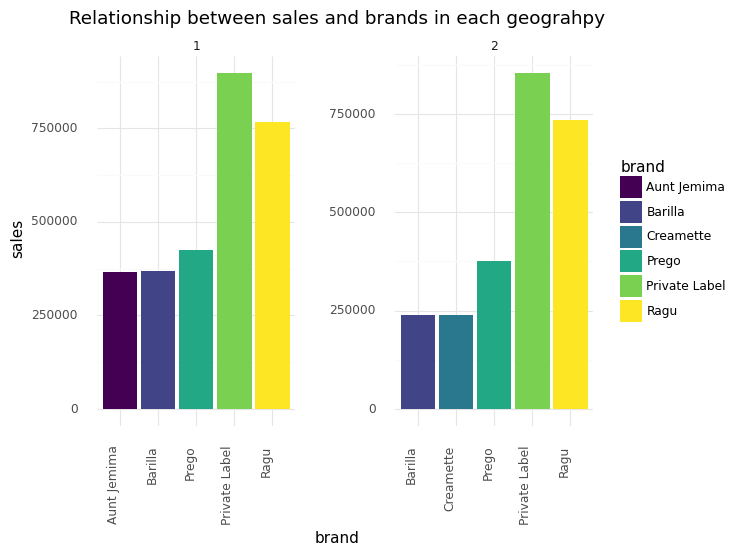

<ggplot: (107231826375)>

In [64]:
(
    ggplot(top5_geo_brands) 
    + aes("brand", "sales", fill = 'brand')
    + geom_col()
    + theme_minimal()
    + facet_wrap('~geography', nrow = 1, scales="free")
    + theme(panel_spacing=1.0, axis_text_x=element_text(angle=90, ha='right', va='top'))
    + scale_color_ordinal(aesthetics = "fill")
    + labs(
        title = 'Relationship between sales and brands in each geograhpy'
    )
)